In [1]:
library('tidyverse')
library('patchwork')
library('nycflights13')
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Use filter to make a table with just flights weather data from January.

In [2]:
weather_jan = weather %>%
                    filter(month == 1)
    

In [23]:
weather_jan %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


Do the same for June.

In [4]:
weather_june= weather %>%
                    filter(month == 6)

Use `filter` and `summarize` to produce two single row tables. One that has the median `temp` for January, and one that has the median `temp` for June.

In [5]:
# E.g.

median.january  = weather %>% 
    group_by(month) %>%
    filter(month == 1) %>% 
    summarize(median.temp = median(temp))

median.june = weather %>%
        group_by(month) %>%
            filter(month == 6) %>%
                summarize(median.temp = median(temp))

median.january
median.june

month,median.temp
<int>,<dbl>
1,37.04


month,median.temp
<int>,<dbl>
6,71.96


Re-create the following figure.

<img src="./example.png" style="width: 800px;" />

- Use `geom_hline` for the median line.
- Use `scale_color_viridis_c` to set the color scale.
- This chart can be made by facetting or each plot can be created by itself and combined with `patchwork`. For this example use `patchwork`.
- Use `ylim` to make the y-axis for each plot the same. 

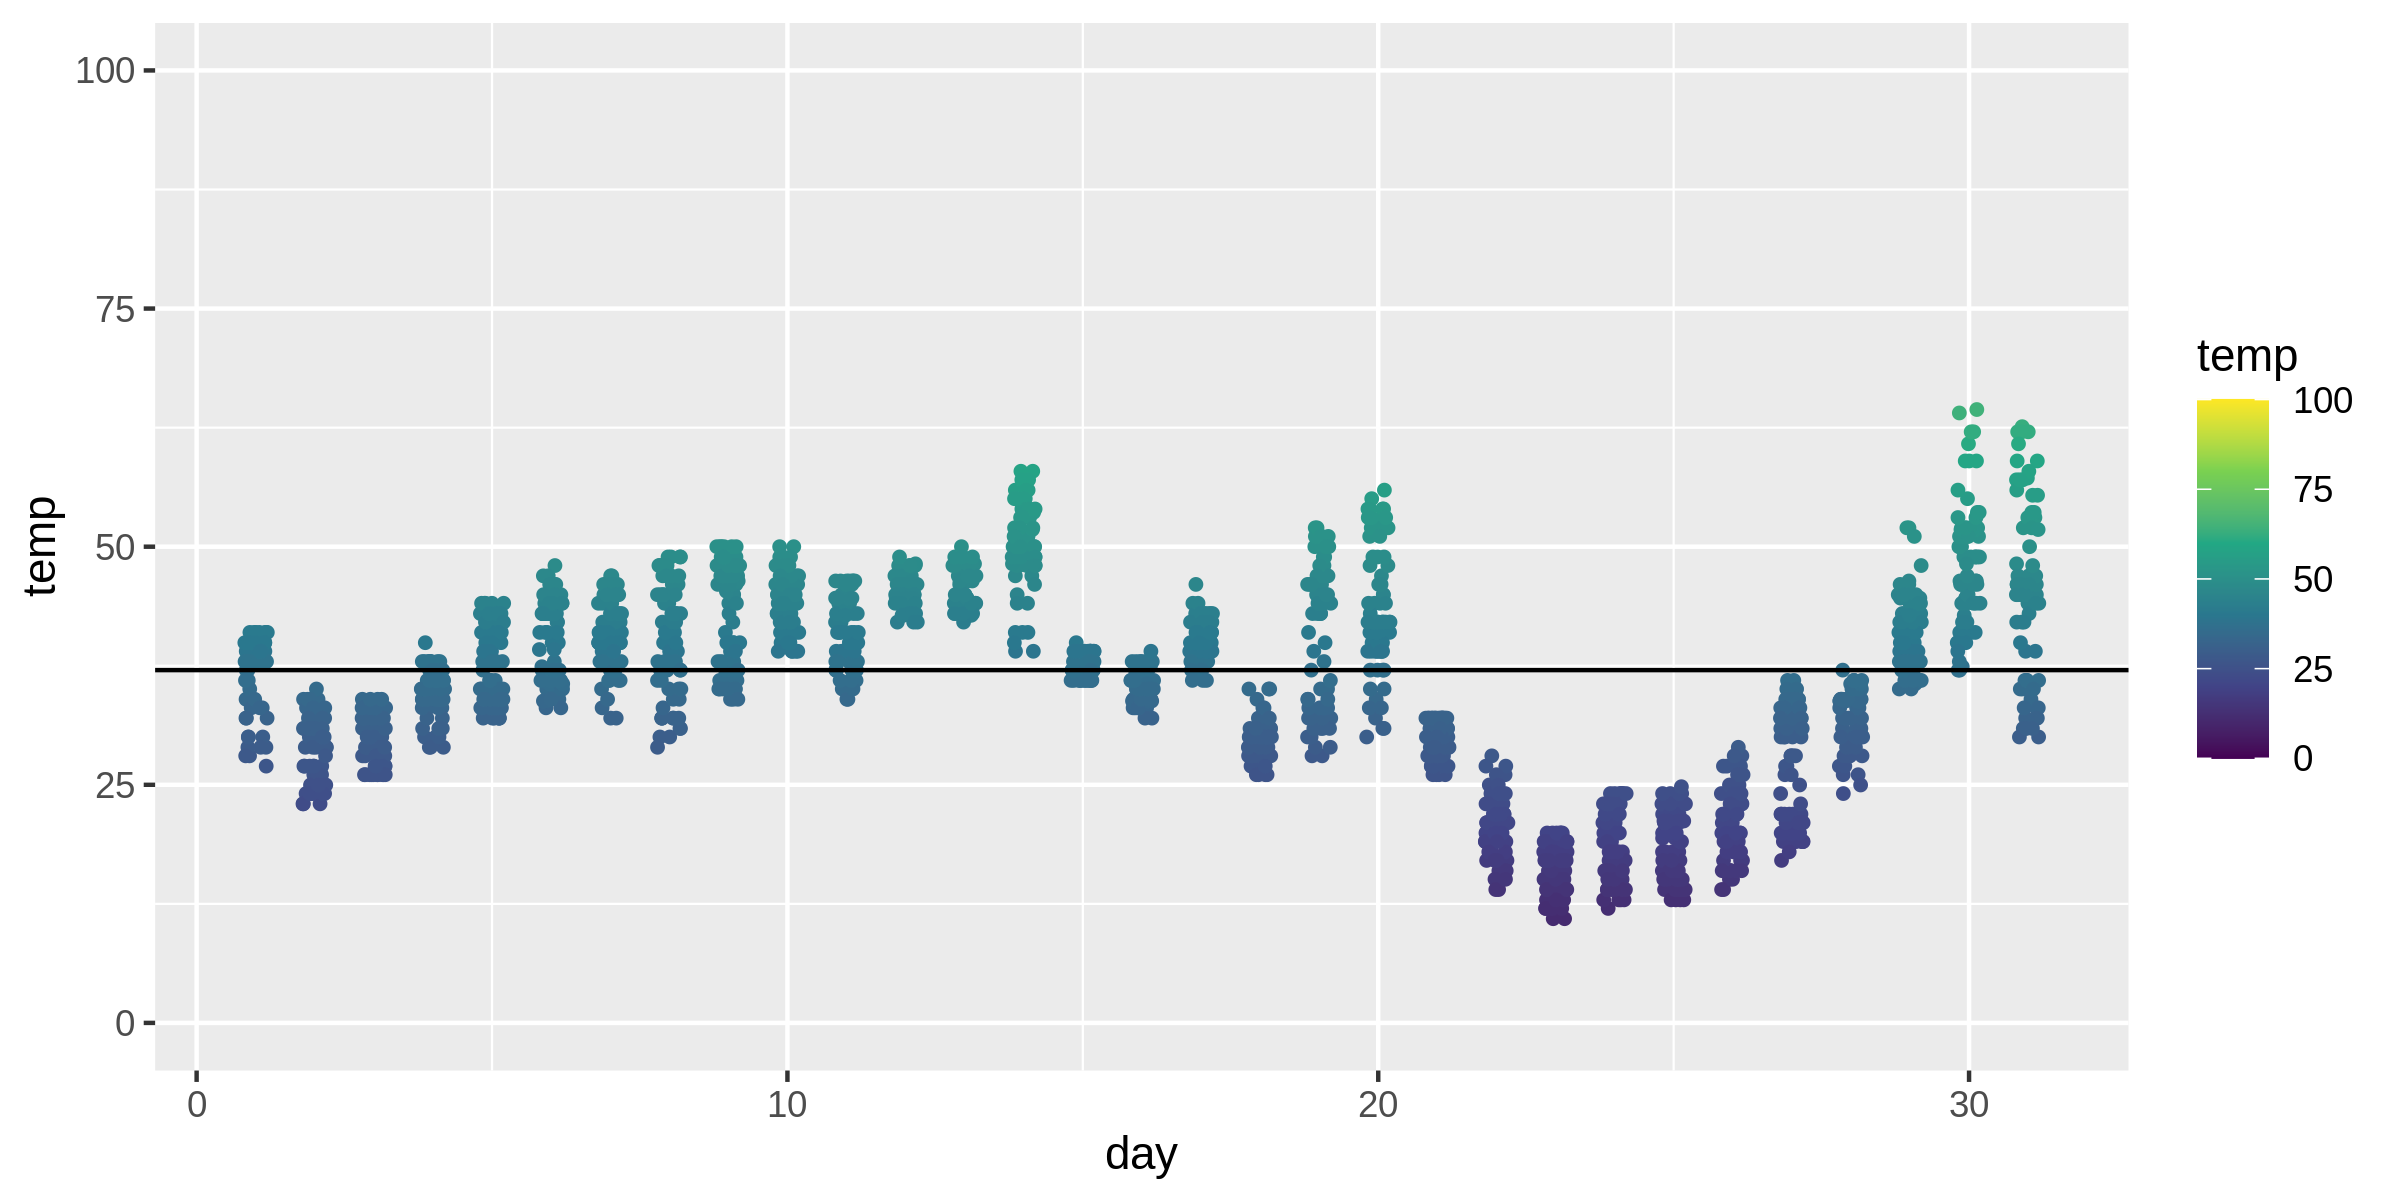

In [18]:
#He created a separate table to do the below he basically created a table to contain the median_temp value which would pull from a separate variable m which you could change to swap months.
# Practice this at home. My second plot is incorrect, I need to look at that
# p = p + geom_hline( data = median_temp, aes(yintercept = median_temp))


p = ggplot(weather_jan, aes(x = day, y = temp, color = temp))

p = p + geom_point(position = position_jitter(h = 0, w = 0.2), size = 1)

# p = p + geom_hline(yintercept = median(weather$temp))

p = p + geom_hline(yintercept = 37.04)

p = p + scale_colour_viridis_c(limits = c(0,100))

p = p + scale_y_continuous(limits = c(0,100))

p

# p = p + ylim(5, 100) this will manually change the axis because ggplot auto sets these axes

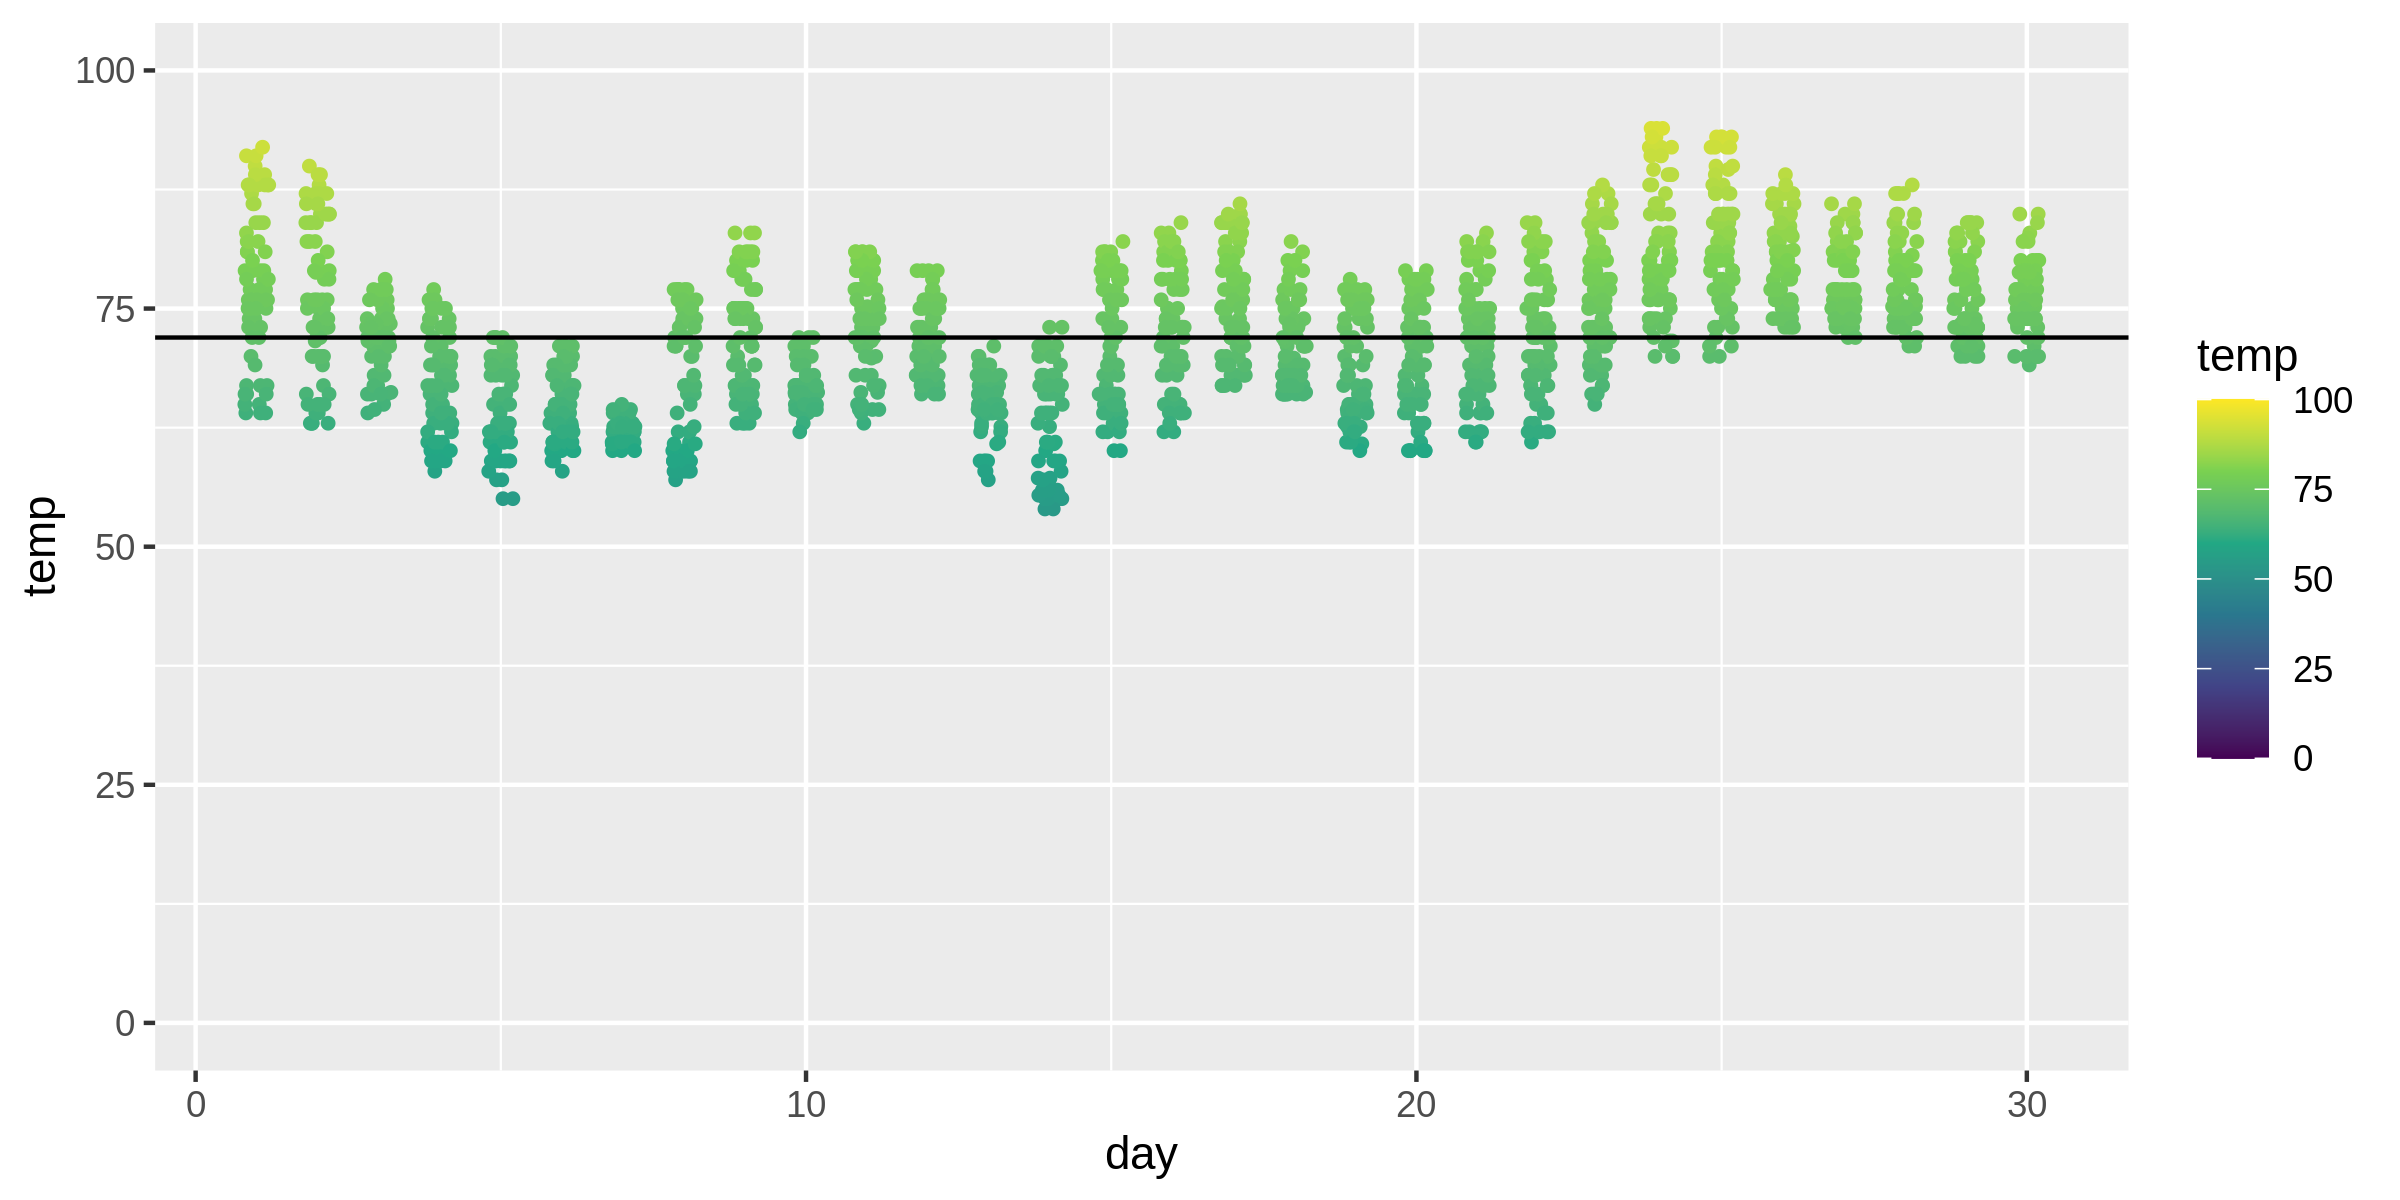

In [19]:
p2 = ggplot(weather_june, aes(x = day, y = temp, color = temp))

p2 = p2 + geom_point(position = position_jitter(h = 0, w = 0.2), size = 1)

p2 = p2 + geom_hline(yintercept = 71.96)

p2 = p2 + scale_colour_viridis_c(limits = c(0,100))

p2 = p2 + scale_y_continuous(limits = c(0,100))

p2

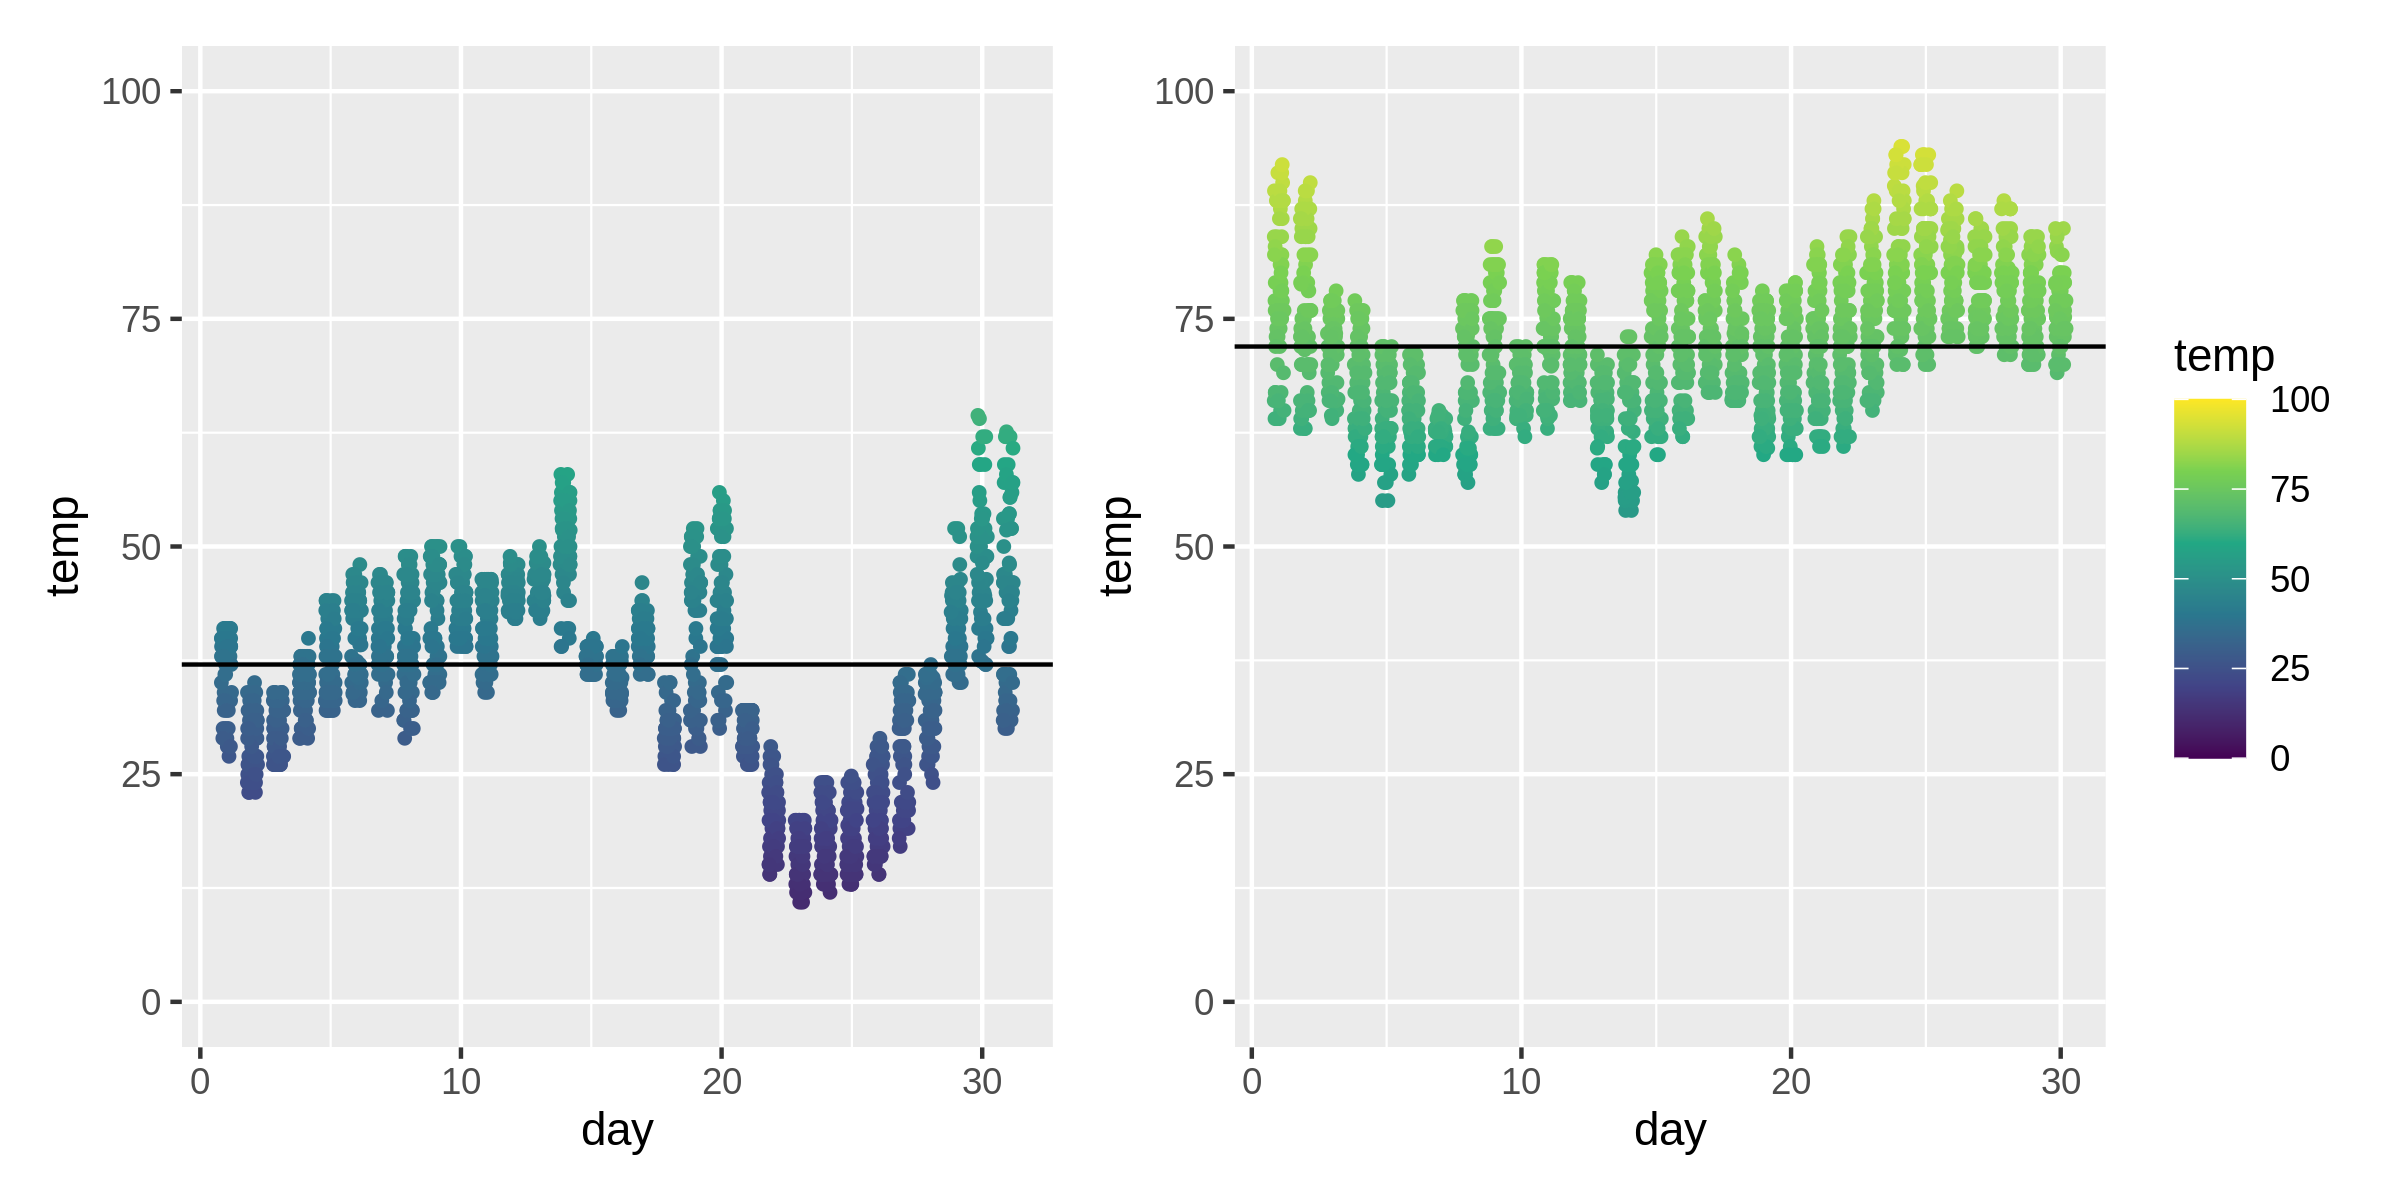

In [20]:
p + p2 + plot_layout(guides = 'collect')